Referensi: https://www.kaggle.com/code/abdokamr/cross-validation-hyperparameters-tuning

## TODO BESOK:
- Pake dataset yang agak besar, biar keliatan signifikan perbedaannya

**Flow nya:**
- Gather data
- Preprocess Data
- Baseline model
- Basic Model Logistic Regression
- Cross validation
- Cross Validation + Hyperparameter Tuning

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
wrn.filterwarnings("ignore")

### Read Data

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.corr()

/tmp/ipykernel_28852/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Only using 2 variables

Drop `SepalLengthCm` and `SepalWidthCm` cols

In [5]:
DROP_COLS = ["Id", "SepalLengthCm", "SepalWidthCm"]

In [6]:
def drop_columns(cols_name):
    data.drop(cols_name, axis=1, inplace=True)

In [7]:
drop_columns(DROP_COLS)

In [8]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Only Pick Virginica

Nanti sisa nya akan di convert jadi Non-Virginica

In [10]:
data["Species"][data["Species"] != "Iris-virginica"] = "Non-virginica"

/tmp/ipykernel_28852/4184929900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"][data["Species"] != "Iris-virginica"] = "Non-virginica"


In [11]:
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Non-virginica
1,1.4,0.2,Non-virginica
2,1.3,0.2,Non-virginica
3,1.5,0.2,Non-virginica
4,1.4,0.2,Non-virginica
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [12]:
data["Species"].value_counts()

Non-virginica     100
Iris-virginica     50
Name: Species, dtype: int64

### Create Visualization

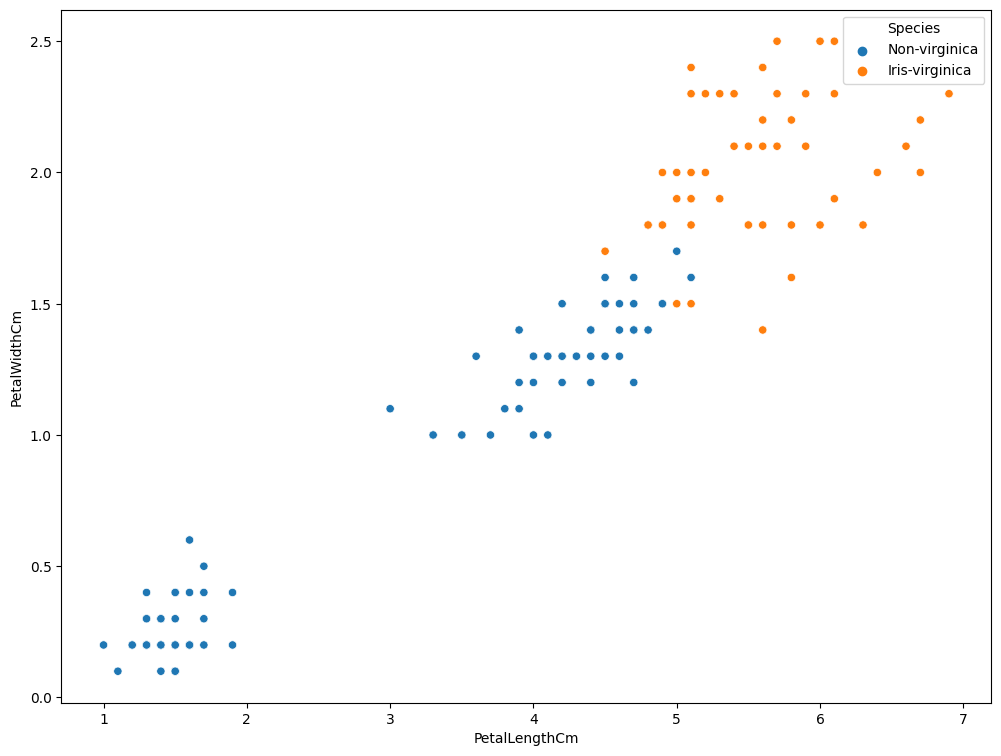

In [13]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

### Split Input Output 

In [14]:
def split_input_output(data, output_col):
    X = data.drop(columns=output_col)
    y = data[output_col]
    
    return X, y

In [15]:
X, y = split_input_output(data=data,
                          output_col="Species")

In [16]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
X.shape

(150, 2)

In [18]:
y.head()

0    Non-virginica
1    Non-virginica
2    Non-virginica
3    Non-virginica
4    Non-virginica
Name: Species, dtype: object

In [19]:
y.shape

(150,)

In [20]:
y.value_counts()

Non-virginica     100
Iris-virginica     50
Name: Species, dtype: int64

### Train Test Split 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [24]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [25]:
y_test.value_counts()

Non-virginica     20
Iris-virginica    10
Name: Species, dtype: int64

### Preprocessing

In [26]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [27]:
def convert_class(y_train, y_test, class_name):
    y_train = y_train.apply(lambda x: 1 if x == class_name else 0)
    y_test = y_test.apply(lambda x: 1 if x == class_name else 0)
    
    return y_train, y_test

In [28]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-virginica")

In [29]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [30]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [31]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

### Modelling with Logistic Regression 

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression()

In [35]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred_train_proba = logreg.predict_proba(X_train)

In [37]:
y_pred_train_proba

array([[4.99149131e-02, 9.50085087e-01],
       [9.27157414e-01, 7.28425863e-02],
       [9.78127099e-01, 2.18729013e-02],
       [6.48517904e-03, 9.93514821e-01],
       [4.76443763e-01, 5.23556237e-01],
       [2.91712141e-01, 7.08287859e-01],
       [9.99995958e-01, 4.04230193e-06],
       [9.99993401e-01, 6.59915191e-06],
       [9.99985798e-01, 1.42018564e-05],
       [8.92466194e-01, 1.07533806e-01],
       [5.10763352e-03, 9.94892366e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.76749441e-01, 2.32505589e-02],
       [9.99994328e-01, 5.67240160e-06],
       [2.78970655e-01, 7.21029345e-01],
       [9.99994671e-01, 5.32878252e-06],
       [2.46858378e-02, 9.75314162e-01],
       [2.93449337e-02, 9.70655066e-01],
       [6.75821465e-01, 3.24178535e-01],
       [7.98362850e-01, 2.01637150e-01],
       [9.99994328e-01, 5.67240160e-06],
       [4.54344008e-01, 5.45655992e-01],
       [7.45650126e-02, 9.25434987e-01],
       [9.99996525e-01, 3.47462098e-06],
       [8.474698

In [38]:
y_pred_train = logreg.predict(X_train)

In [39]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

In [41]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.9916666666666667

In [43]:
y_pred_test = logreg.predict(X_test)

In [44]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0])

In [45]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9

In [46]:
print(f"Logistic Regression training accuracy {acc_train}")
print(f"Logistic Regression test accuracy {acc_test}")

Logistic Regression training accuracy 0.9916666666666667
Logistic Regression test accuracy 0.9


In [47]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30



### Cross Validation and Hyperparameter Tuning 

#### Without Hyperparameter Tuning 

In [55]:
from sklearn.model_selection import cross_val_score, KFold

In [56]:
k_folds = KFold(n_splits = 5)
k_folds

KFold(n_splits=5, random_state=None, shuffle=False)

In [61]:
val_scores = cross_val_score(estimator= logreg, X= X_train, y= y_train, cv=5)
val_scores

array([1.        , 0.95833333, 1.        , 1.        , 1.        ])

In [62]:
val_scores.mean()

0.9916666666666668

#### With Hyperparameter Tuning GridSearch and RandomSearch 

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
np.linspace(0.5, 10, 20)

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [105]:
PARAMS = {
    "penalty": ['l1', 'l2'],
    "C": np.linspace(0.5, 10, 20),
    "solver": ["linear", "saga"],
    "max_iter": [100, 500, 1000, 5000, 10000]
}

In [87]:
PARAMS

{'penalty': ['l1', 'l2'],
 'C': array([ 0.5  ,  2.875,  5.25 ,  7.625, 10.   ]),
 'solver': ['linear', 'saga'],
 'max_iter': [100, 500, 5000, 10000]}

In [88]:
scorer = make_scorer(accuracy_score)

In [89]:
def generate_best_models(method, 
                         classifier, 
                         parameters, 
                         scorer,
                         X, y):
    
    if method == "Grid":
        search_obj = GridSearchCV(classifier, parameters, scoring=scorer, verbose=1)
    
    elif method == "Random":
        search_obj = RandomizedSearchCV(classifier, parameters, scoring=scorer, verbose=1)
    
    else:
        raise Exception("Method doesn't exists")
        
    fit_obj = search_obj.fit(X, y)
    best_clf = fit_obj.best_estimator_
    
    return best_clf

In [90]:
%time

best_clf_grid = generate_best_models(method = "Grid",
                                     classifier=logreg,
                                     parameters=PARAMS,
                                     scorer=scorer,
                                     X=X_train,
                                     y=y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [115]:
best_logreg_grid = GridSearchCV(estimator= logreg, param_grid=PARAMS,
                                cv= 5, verbose= 3)

best_logreg_grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                         'max_iter': [100, 500, 1000, 5000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['linear', 'saga']},
             verbose=3)

In [116]:
%%time
best_logreg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 1/5] END C=0.5, max_it

[CV 1/5] END C=1.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 2/5] END C=1.0, max_iter=500, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=1.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=1.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=1.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=1.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time= 

[CV 4/5] END C=1.5, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=1.5, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=1.5, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=1.5, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=1.5, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=1.5, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=1.5, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=1.5, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=1.5, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=1.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=1.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total tim

[CV 4/5] END C=2.0, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=2.0, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=2.0, max_iter=500, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=2.0, max_iter=500, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=2.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=2.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=2.0, max_iter=500, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=2.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=2.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=2.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=2.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   

[CV 2/5] END C=2.5, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=2.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=2.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=2.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=2.5, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=2.5, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=2.5, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=2.5, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=2.5, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=2.5, max_iter=1000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 2/5] END C=2.5, max_iter=1000, penalty=l2, solver=saga;, score=0.958 total t

[CV 3/5] END C=3.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=3.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=3.0, max_iter=1000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=3.0, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=3.0, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=3.0, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=3.0, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=3.0, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=3.0, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=3.0, max_iter=1000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=3.0, max_iter=1000, penalty=l2, solver=linear;, score=nan total t

[CV 1/5] END C=3.5, max_iter=1000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=3.5, max_iter=1000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=3.5, max_iter=1000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=3.5, max_iter=1000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=3.5, max_iter=1000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=3.5, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=3.5, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=3.5, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=3.5, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=3.5, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=3.5, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total t

[CV 2/5] END C=4.0, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=4.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=4.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=4.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=4.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=4.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=4.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=4.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=4.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=4.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 2/5] END C=4.0, max_iter=5000, penalty=l2, solver=saga;, score=0.958 total t

[CV 1/5] END C=4.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 2/5] END C=4.5, max_iter=5000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=4.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=4.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=4.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=4.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=4.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=4.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=4.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=4.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=4.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 t

[CV 3/5] END C=5.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=5.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=5.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=5.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=5.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=5.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=5.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=5.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=5.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=5.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=5.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000

[CV 2/5] END C=5.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=5.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=5.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=5.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=5.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=5.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=5.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=5.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=5.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=5.5, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=5.5, max_iter=10000, penalty=l2, solver=linear;, score=

[CV 4/5] END C=6.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=6.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=6.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=6.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=6.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=6.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=6.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=6.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=6.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=6.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=6.0, max_iter=10000, penalty=l1, solver=saga;, score=1.00

[CV 3/5] END C=6.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=6.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=6.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=6.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=6.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=6.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=6.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=6.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=6.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=6.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=6.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000

[CV 2/5] END C=7.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=7.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=7.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=7.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=7.0, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.0, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.0, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.0, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.0, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=7.0, max_iter=10000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=7.0, max_iter=10000, penalty=l2, solver=saga;, score=0.

[CV 1/5] END C=7.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=7.5, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.1s
[CV 3/5] END C=7.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=7.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=7.5, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=7.5, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.5, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.5, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.5, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.5, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=7.5, max_iter=10000, penalty=l2, solver=saga;, score=0.

[CV 5/5] END C=8.0, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=8.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=8.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=8.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=8.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=8.0, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=8.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=8.0, max_iter=10000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=8.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=8.0, max_iter=10000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=8.0, max_iter=10000, penalty=l1, solver=saga;, score=1.0

[CV 1/5] END C=8.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=8.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=8.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=8.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=8.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=8.5, max_iter=5000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=8.5, max_iter=5000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=8.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=8.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=8.5, max_iter=5000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=8.5, max_iter=10000, penalty=l1, solver=linear;, score=nan total 

[CV 1/5] END C=9.0, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=9.0, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=9.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=9.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=9.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=9.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=9.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=9.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=9.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=9.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=9.0, max_iter=5000, penalty=l2, solver=saga;, score=0.958 total t

[CV 1/5] END C=9.5, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=9.5, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=9.5, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=9.5, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=9.5, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=9.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=9.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=9.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=9.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=9.5, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=9.5, max_iter=5000, penalty=l2, solver=saga;, score=0.958 total t

[CV 1/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=10.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, max_iter=5000, penalty=l2, solver=saga;, score=0.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                         'max_iter': [100, 500, 1000, 5000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['linear', 'saga']},
             verbose=3)

In [117]:
best_logreg_grid.best_params_

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [118]:
best_logreg_grid.best_score_

0.9916666666666668

In [119]:
best_logreg_random = RandomizedSearchCV(estimator= logreg, param_distributions=PARAMS,
                                        cv= 5, verbose= 3)

In [120]:
best_logreg_random

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                                        'max_iter': [100, 500, 1000, 5000,
                                                     10000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['linear', 'saga']},
                   verbose=3)

In [121]:
best_logreg_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=8.5, max_iter=10000, penalty=l2, solver=saga;, score=0.958 total time=   0.1s
[CV 2/5] END C=8.5, max_iter=10000, penalty=l2, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=8.5, max_iter=10000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=8.5, max_iter=10000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=8.5, max_iter=10000, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C=3.5, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 2/5] END C=3.5, max_iter=1000, penalty=l1, solver=saga;, score=0.958 total time=   0.0s
[CV 3/5] END C=3.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 4/5] END C=3.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 5/5] END C=3.5, max_iter=1000, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 1/5] END C

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                                        'max_iter': [100, 500, 1000, 5000,
                                                     10000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['linear', 'saga']},
                   verbose=3)

In [122]:
best_logreg_random.best_params_

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 5000, 'C': 1.5}

In [123]:
best_logreg_random.best_score_

0.9916666666666668

In [124]:
best_model = LogisticRegression(penalty='l2',
                                solver='saga',
                                C=1.5,
                                max_iter=5000)

In [125]:
best_model.fit(X_train, y_train)

LogisticRegression(C=1.5, max_iter=5000, solver='saga')

In [126]:
y_pred_train_proba = best_model.predict_proba(X_train)

In [127]:
y_pred_train_proba

array([[3.65445690e-02, 9.63455431e-01],
       [9.43466842e-01, 5.65331577e-02],
       [9.85591602e-01, 1.44083982e-02],
       [3.73518866e-03, 9.96264811e-01],
       [4.74562807e-01, 5.25437193e-01],
       [2.55670591e-01, 7.44329409e-01],
       [9.99998967e-01, 1.03253761e-06],
       [9.99998202e-01, 1.79818858e-06],
       [9.99995768e-01, 4.23216300e-06],
       [9.09501317e-01, 9.04986833e-02],
       [2.59745467e-03, 9.97402545e-01],
       [9.99999199e-01, 8.01262501e-07],
       [9.84899957e-01, 1.51000431e-02],
       [9.99998537e-01, 1.46342873e-06],
       [2.46720135e-01, 7.53279865e-01],
       [9.99998605e-01, 1.39541776e-06],
       [1.49032224e-02, 9.85096778e-01],
       [2.03454422e-02, 9.79654558e-01],
       [6.90335338e-01, 3.09664662e-01],
       [8.26704147e-01, 1.73295853e-01],
       [9.99998537e-01, 1.46342873e-06],
       [4.35303150e-01, 5.64696850e-01],
       [5.92550588e-02, 9.40744941e-01],
       [9.99999160e-01, 8.40315088e-07],
       [8.711549

In [129]:
y_pred_train = best_model.predict(X_train)

In [130]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [131]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.9916666666666667

In [137]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [132]:
y_pred_test = best_model.predict(X_test)

In [133]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0])

In [134]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9

In [135]:
print(f"Logistic Regression training accuracy {acc_train}")
print(f"Logistic Regression test accuracy {acc_test}")

Logistic Regression training accuracy 0.9916666666666667
Logistic Regression test accuracy 0.9


In [136]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30



In [140]:
best_model.coef_, best_model.intercept_

(array([[3.01174729, 2.53586374]]), array([-18.76069538]))

In [141]:
print('intercept ', logreg.intercept_[0])
print('classes', logreg.classes_)
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

intercept  -16.9284877604466
classes [0 1]


,coeff
PetalLengthCm,2.763098
PetalWidthCm,2.138196


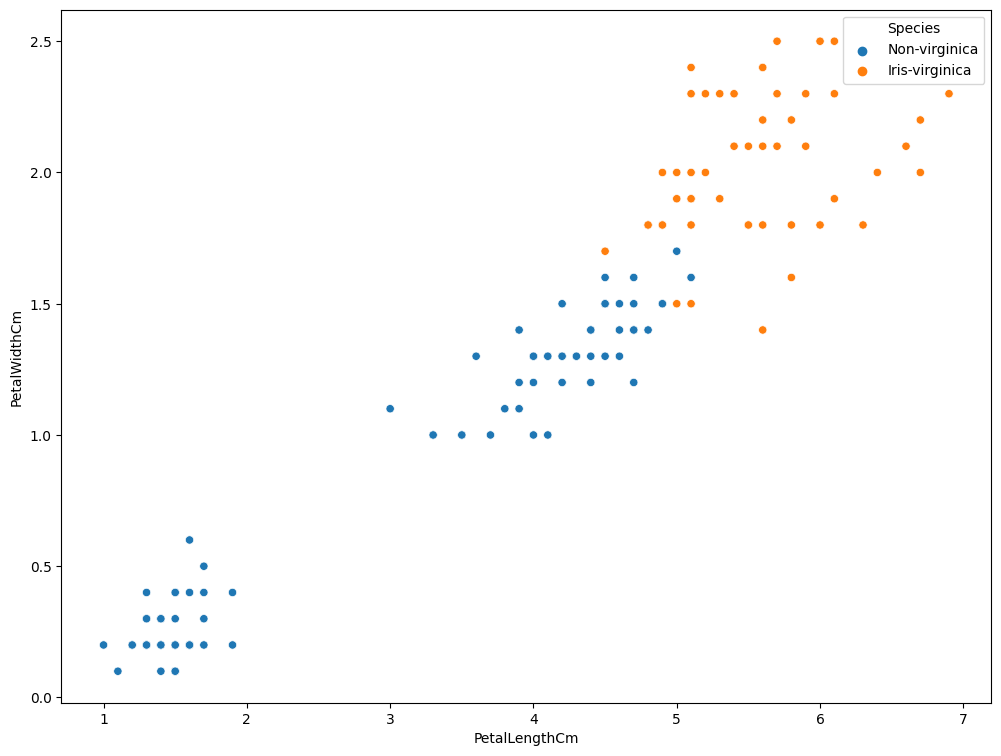

In [142]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

In [143]:
coef_1, coef_2 = best_model.coef_[0]

In [144]:
itc = best_model.intercept_[0]

In [145]:
m_boundary = -coef_1 / coef_2
m_boundary

-1.1876613239771705

In [146]:
c_boundary = -itc / coef_2
c_boundary

7.398148039202125

In [147]:
print(m_boundary, c_boundary)

-1.1876613239771705 7.398148039202125


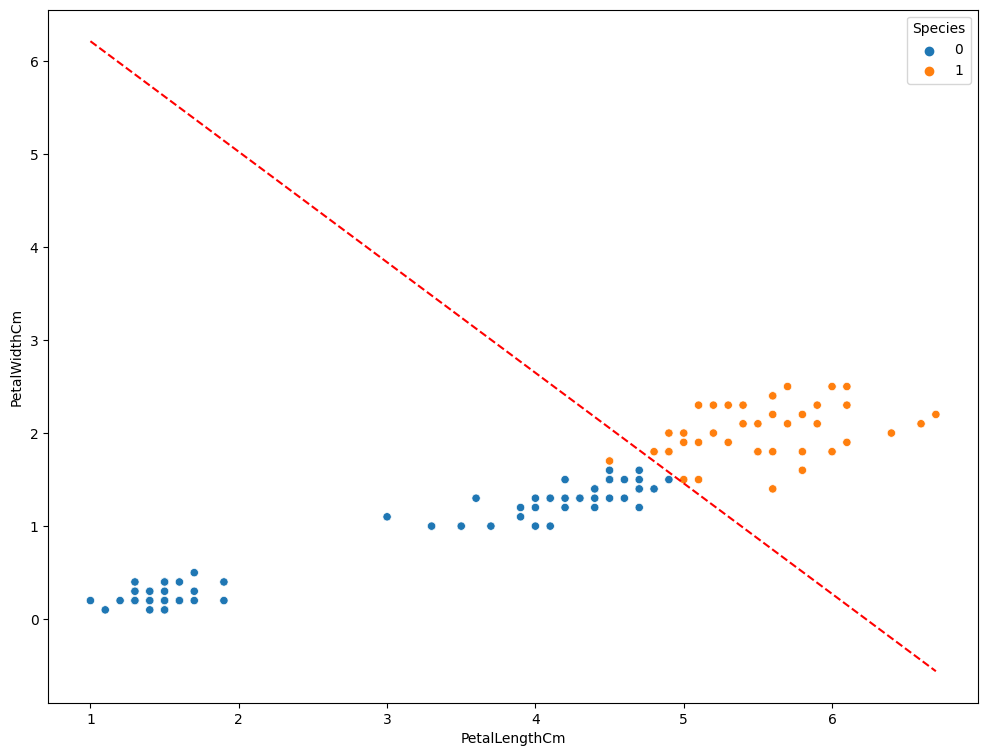

In [148]:
plt.figure(figsize=(12, 9))

data = X_train.copy()
data["Species"] = y_train

sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data["PetalLengthCm"].min(), 
                        data["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

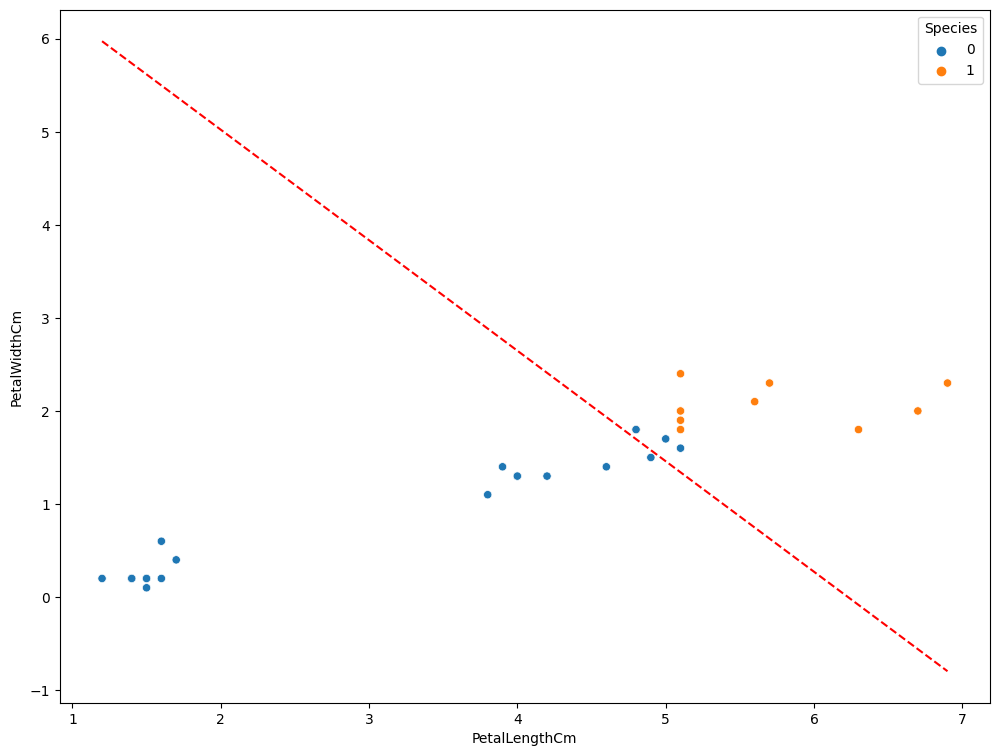

In [149]:
plt.figure(figsize=(12, 9))

data = X_test.copy()
data["Species"] = y_test

sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data["PetalLengthCm"].min(), 
                        data["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()